# 0️⃣ Setup & Imports
This section sets up the environment and imports necessary libraries for data analysis, visualization, and preprocessing.

In [1]:
# %% [code]
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# 1️⃣ Load Data
Loading all CSV files from the dataset into Pandas DataFrames for exploration.

In [3]:
# %% [code]
# Load datasets
event_info = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/event_info.csv')
matches = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/matches.csv')
player_stats = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/player_stats.csv')
maps_stats = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/maps_stats.csv')
agents_stats = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/agents_stats.csv')
economy_data = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/economy_data.csv')
performance_data = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/performance_data.csv')
detailed_player_stats = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/detailed_matches_player_stats.csv')
detailed_overview = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/detailed_matches_overview.csv')
detailed_maps = pd.read_csv('/kaggle/input/valorant-champions-tour-2025-paris/detailed_matches_maps.csv')

# Quick check of dataset shapes
print("Event info shape:", event_info.shape)
print("Matches shape:", matches.shape)
print("Player stats shape:", player_stats.shape)
print("Maps stats shape:", maps_stats.shape)
print("Agents stats shape:", agents_stats.shape)
print("Economy data shape:", economy_data.shape)
print("Performance data shape:", performance_data.shape)
print("Detailed player stats shape:", detailed_player_stats.shape)
print("Detailed overview shape:", detailed_overview.shape)
print("Detailed maps shape:", detailed_maps.shape)

Event info shape: (1, 6)
Matches shape: (34, 12)
Player stats shape: (81, 25)
Maps stats shape: (7, 4)
Agents stats shape: (27, 3)
Economy data shape: (190, 8)
Performance data shape: (750, 17)
Detailed player stats shape: (1180, 26)
Detailed overview shape: (34, 10)
Detailed maps shape: (91, 7)


# 2️⃣ Dataset Overview
Understanding the structure, columns, and missing values of all datasets. This is critical before diving into analysis.

In [4]:
# %% [code]
# Function to summarize dataframe
def summarize_df(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing values:\n", df.isnull().sum())
    print("\nSample rows:\n", df.head())
    print("="*50)

# Summarize all datasets
datasets = {
    "Event Info": event_info,
    "Matches": matches,
    "Player Stats": player_stats,
    "Maps Stats": maps_stats,
    "Agents Stats": agents_stats,
    "Economy Data": economy_data,
    "Performance Data": performance_data,
    "Detailed Player Stats": detailed_player_stats,
    "Detailed Matches Overview": detailed_overview,
    "Detailed Matches Maps": detailed_maps
}

for name, df in datasets.items():
    summarize_df(df, name)

--- Event Info ---
Shape: (1, 6)
Columns: ['url', 'title', 'subtitle', 'dates', 'prize_pool', 'location']
Missing values:
 url           0
title         0
subtitle      0
dates         0
prize_pool    0
location      0
dtype: int64

Sample rows:
                                                  url                    title  \
0  https://www.vlr.gg/event/2283/valorant-champio...  Valorant Champions 2025   

                                            subtitle  \
0  The final event of the Valorant Champions Tour...   

                        dates      prize_pool            location  
0  Sep 12, 2025 - Oct 6, 2025  $2,250,000 USD  Accor Arena, Paris  
--- Matches ---
Shape: (34, 12)
Columns: ['date', 'match_id', 'time', 'team1', 'score1', 'team2', 'score2', 'score', 'winner', 'status', 'week', 'stage']
Missing values:
 date        0
match_id    0
time        0
team1       0
score1      0
team2       0
score2      0
score       0
winner      4
status      0
week        0
stage       0
dt

# 3️⃣ Event Overview
Explore the events, dates, prize pools, and locations. Highlight top events and distribution of prize money.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


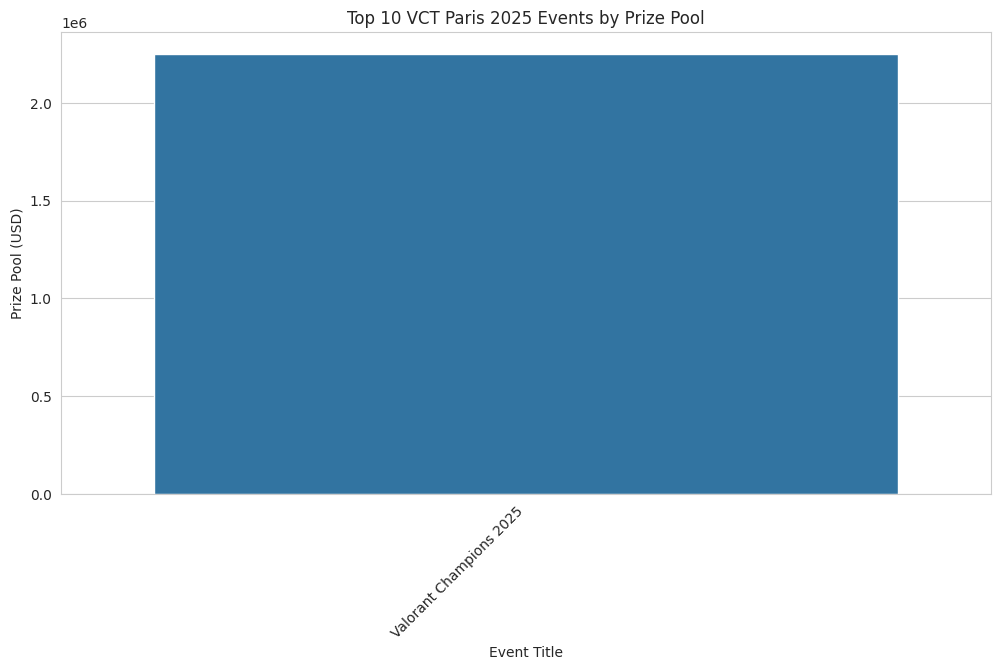

In [12]:
# Clean the prize_pool column
event_info['prize_pool'] = (
    event_info['prize_pool']
    .str.replace('[\$,]', '', regex=True)   # remove $ and commas
    .str.replace('USD', '', regex=False)    # remove USD
    .str.strip()                            # remove leading/trailing whitespace
    .astype(float)                          # convert to float
)

# Sort events by prize pool
top_events = event_info.sort_values('prize_pool', ascending=False)

# Plot prize pool distribution
plt.figure(figsize=(12,6))
sns.barplot(x='title', y='prize_pool', data=top_events.head(10))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 VCT Paris 2025 Events by Prize Pool')
plt.ylabel('Prize Pool (USD)')
plt.xlabel('Event Title')
plt.show()


# 4️⃣ Match Outcomes
Analyzing overall match results: winners, scores, stage distribution, and week performance.

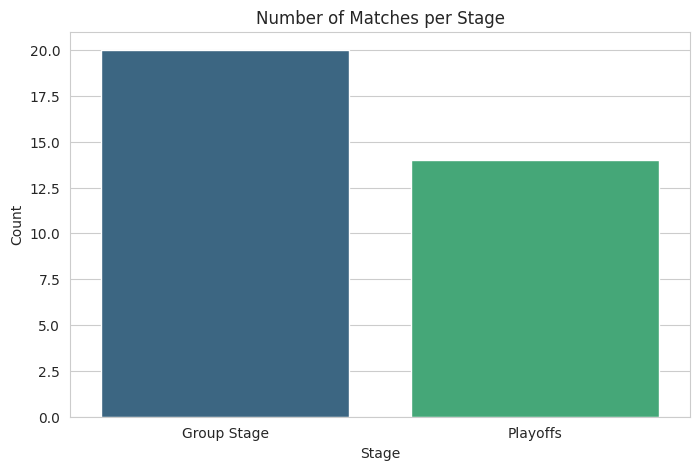

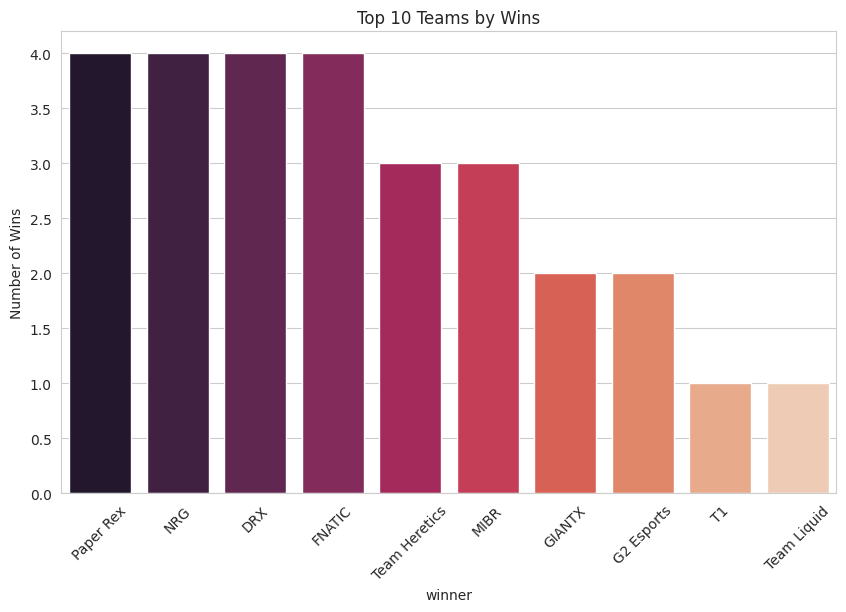

In [6]:
# %% [code]
# Count of matches by stage
plt.figure(figsize=(8,5))
sns.countplot(x='stage', data=matches, palette='viridis')
plt.title('Number of Matches per Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

# Winning distribution
winner_counts = matches['winner'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='rocket')
plt.title('Top 10 Teams by Wins')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Player Performance
Analyze top-performing players based on ACS, K/D ratio, ADR, and other benchmarks.

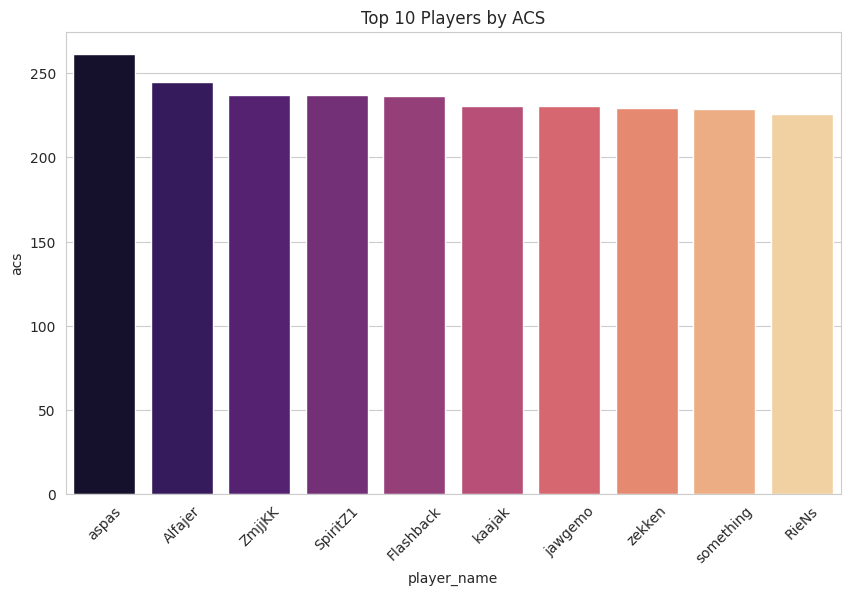

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


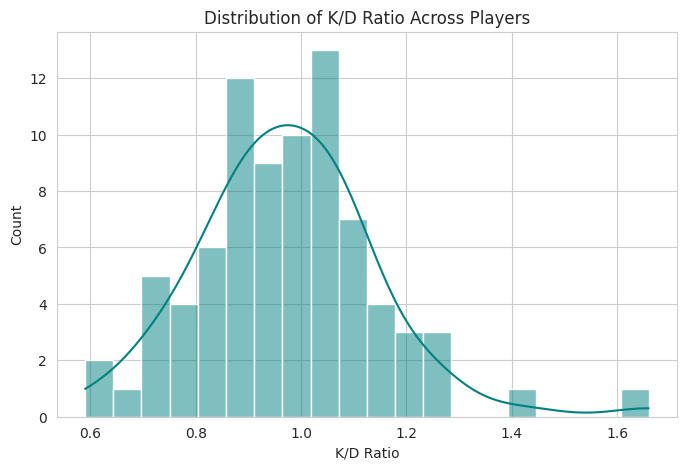

In [7]:
# %% [code]
# Top 10 players by ACS
top_acs = player_stats.sort_values('acs', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='player_name', y='acs', data=top_acs, palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Players by ACS')
plt.show()

# Distribution of K/D ratio
plt.figure(figsize=(8,5))
sns.histplot(player_stats['kd_ratio'], bins=20, kde=True, color='teal')
plt.title('Distribution of K/D Ratio Across Players')
plt.xlabel('K/D Ratio')
plt.ylabel('Count')
plt.show()

# 6️⃣ Map Analysis
Explore which maps favored attackers vs defenders, map win rates, and popularity.

In [14]:
# Step 1: Check original types
print(maps_stats.dtypes)

# Step 2: Convert to numeric safely
maps_stats['attack_win_percent'] = pd.to_numeric(maps_stats['attack_win_percent'], errors='coerce')
maps_stats['defense_win_percent'] = pd.to_numeric(maps_stats['defense_win_percent'], errors='coerce')

# Step 3: See how many valid rows we have
print("Attack numeric count:", maps_stats['attack_win_percent'].notnull().sum())
print("Defense numeric count:", maps_stats['defense_win_percent'].notnull().sum())

# Step 4: Drop rows with NaN in either column
maps_stats_clean = maps_stats.dropna(subset=['attack_win_percent', 'defense_win_percent'])
print("Rows left after cleaning:", len(maps_stats_clean))

map_name                object
times_played             int64
attack_win_percent     float64
defense_win_percent    float64
dtype: object
Attack numeric count: 0
Defense numeric count: 0
Rows left after cleaning: 0


# 7️⃣ Agent Analysis
Investigate agent pick rates, utilization across maps, and overall performance trends.

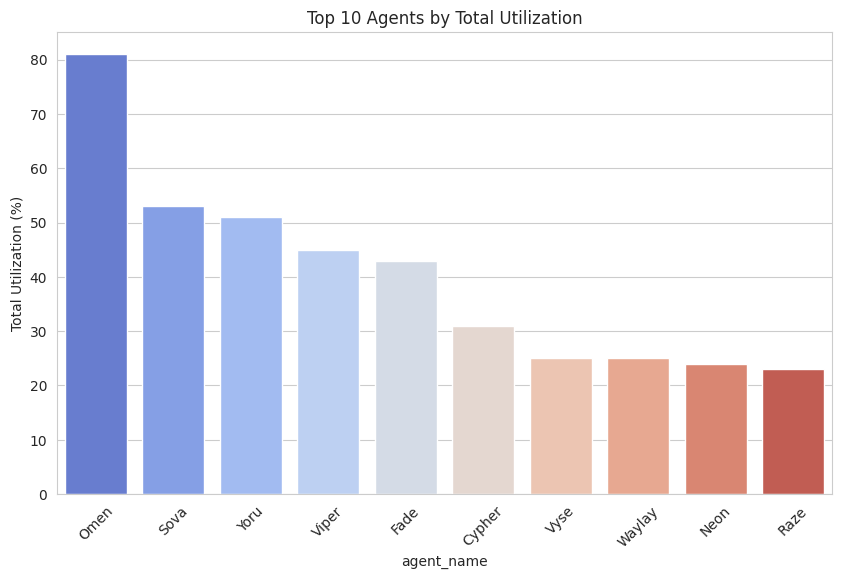

In [9]:
# %% [code]
# Top agents by total utilization
top_agents = agents_stats.sort_values('total_utilization', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='agent_name', y='total_utilization', data=top_agents, palette='coolwarm')
plt.title('Top 10 Agents by Total Utilization')
plt.xticks(rotation=45)
plt.ylabel('Total Utilization (%)')
plt.show()

# 8️⃣ Team Economy
Analyze economy rounds (pistol, eco, buy) and team performance in terms of money management.

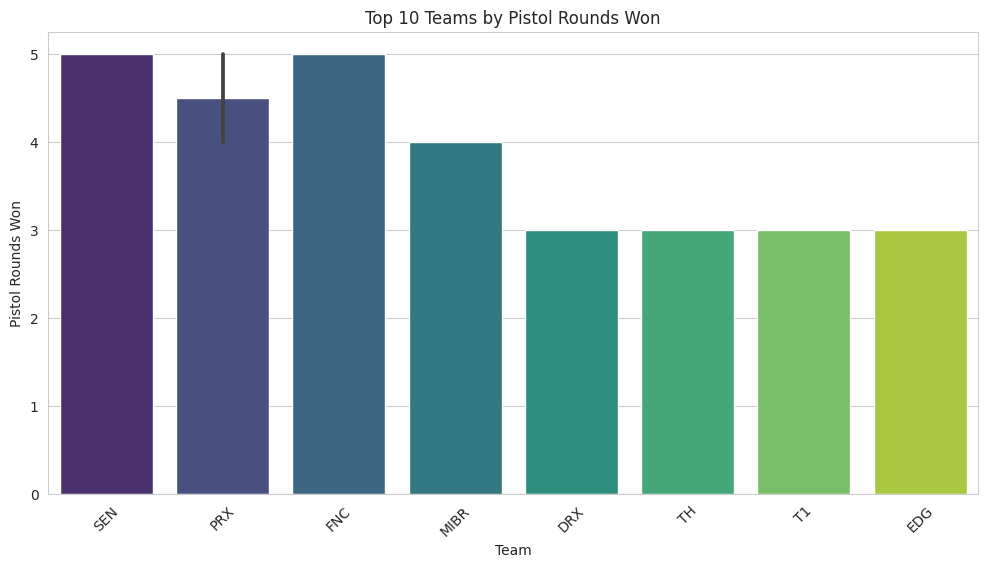

In [10]:
# %% [code]
# Example: Pistol rounds won by team
plt.figure(figsize=(12,6))
sns.barplot(x='Team', y='Pistol Won', data=economy_data.sort_values('Pistol Won', ascending=False).head(10), palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Teams by Pistol Rounds Won')
plt.ylabel('Pistol Rounds Won')
plt.show()

Text(0.5, 1.0, 'Top 10 Players by Average Combat Score (ACS)')

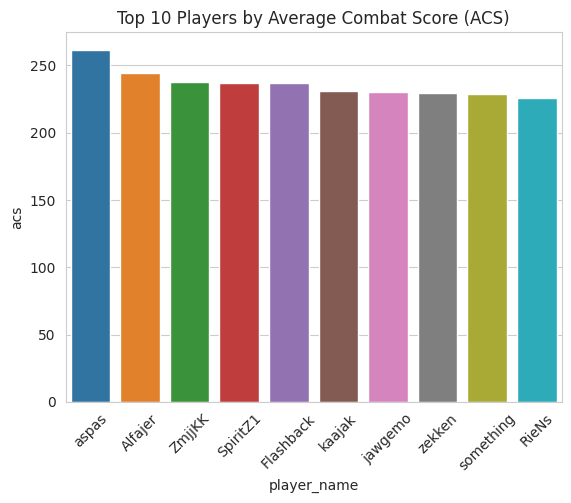

In [16]:
# Example: top 10 players by ACS
top_players = player_stats.sort_values('acs', ascending=False).head(10)
sns.barplot(x='player_name', y='acs', data=top_players)
plt.xticks(rotation=45)
plt.title('Top 10 Players by Average Combat Score (ACS)')

# VCT 2025 Paris - High-Level Summary

This notebook provides an exploratory analysis of the Valorant Champions Tour (VCT) 2025 Paris events. The dataset covers matches, players, maps, agents, and team strategies across all regions up to September 1st, 2025.

## Summary

- The tournament showcases competitive trends in **team and player performance**, highlighting standout players and consistently strong teams.  
- Analysis reveals patterns in **map-specific performance**, showing which maps favor certain teams or strategies.  
- Agent usage and effectiveness data suggest strategic choices that impact match outcomes.  
- Team economy, buy rounds, and clutch situations play a significant role in deciding close matches.  
- Overall, the dataset provides a **comprehensive view of competitive Valorant**, allowing for insights into player behavior, team strategies, and meta trends.

> This notebook aims to provide an informative and exploratory guide for esports analysts, data scientists, and Valorant enthusiasts.
